In [1]:
import pandas as pd
import numpy as np

# Import data

In [70]:
df_ads = pd.read_csv('ads.csv', index_col=0)

df_ads_transaction = pd.read_csv('ads_transaction.csv')

df_referrals = pd.read_csv('referrals.csv')

df_users = pd.read_csv('users.csv', index_col=0)

# Preprocessing

In [3]:
# Rename the 'id' columns for better clarity
df_ads.rename(columns={'id':'ad_id'},inplace=True)
df_ads_transaction.rename(columns={'id':'transaction_id'},inplace=True)
df_referrals.rename(columns={'id':'referral_id'},inplace=True)
df_users.rename(columns={'id':'user_id'},inplace=True)

# Add columns of 1 for groupby functions
df_ads['one'] = 1
df_ads_transaction['one'] = 1

# Merge dataframes for business analysis

In [ ]:
# Merge users and ads to find the number of ads published by user
df_users_ads = pd.merge(df_users, df_ads, how='left', left_on='user_id', right_on='owner_id')
df_users_ads['nb_ads'] = df_users_ads.groupby('user_id')['one'].sum()

# Merge users and ads_transaction to find the number of transactions per user
df_users_transactions_owner = pd.merge(df_users,df_ads_transaction, how='left', left_on='user_id', right_on='ad_owner_id')
df_users_transactions_owner['nb_ads'] = df_users_transactions_owner.groupby('user_id')['one'].sum()

# Analysis

The objective of this analysis is to determine if there are any differences between the users acquired through the different utm_campaigns (ad.recap, aide-coronavirus, message.reply, referral.referBack). In other words, the idea is to determine what types of customers will be brought by which utm_campaign. The final objective is hence to compare the utm_campaigns to determine which one is the most efficient, i.e. which one brings the most interesting profiles. 

For that, we look at the differences of:
- the profiles between the users (sex and age) 
- the activity of the users on the website (nb of ads published and nb of transactions)

### Age

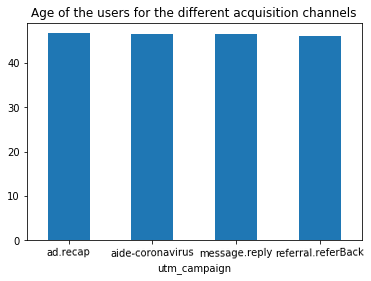

In [18]:
df_users.groupby('utm_campaign')['age'].mean().plot.bar(rot=1,title='Age of the users for the different acquisition channels')

### Sexe

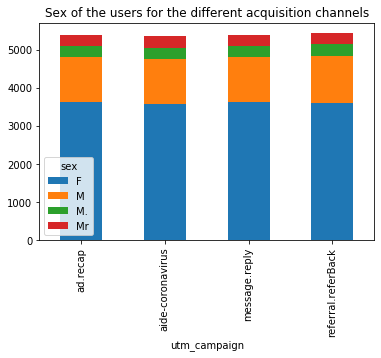

In [59]:
df_users.groupby('utm_campaign')['sex'].value_counts().unstack().plot.bar(stacked=True, title='Sex of the users for the different acquisition channels')

### Nb of ads

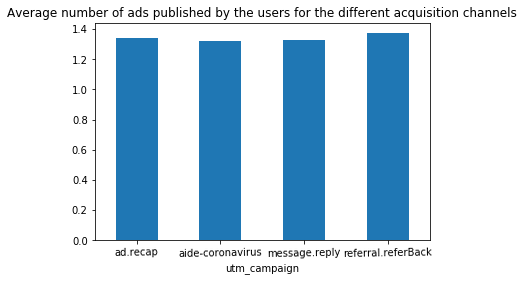

In [62]:
df_users_ads.groupby('utm_campaign').nb_ads.mean().plot.bar(rot=1,title='Average number of ads published by the users for the different acquisition channels')

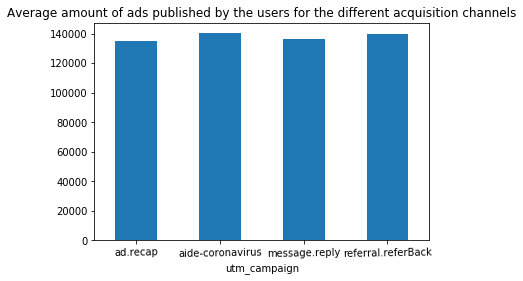

In [63]:
df_users_ads.groupby('utm_campaign').price.mean().plot.bar(rot=1,title='Average amount of ads published by the users for the different acquisition channels')

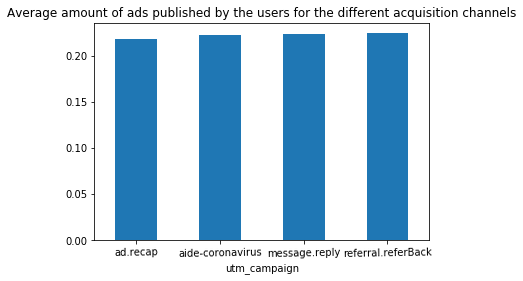

In [68]:
df_users_transactions_owner.groupby('utm_campaign').nb_ads.mean().plot.bar(rot=1,title='Average amount of ads published by the users for the different acquisition channels')

# Conclusion

Unfortunately, we cannot see any major difference between the users acquired by the different utm_campaigns both in terms of profile (age and sex) but also in terms of activity on the website.

This is quite surprising and might be due to the fact that the data is fake. Normally, utm_campaigns should indeed reach different types of users.

# Next steps

On real data, this analysis would have certainly showed very different results between the different utm_campaigns. In that case, it would maybe have been relevant to do some unsupervised clustering (like K means) to obtain a customers segmentation.

Moreover, the analysis I did does not seem to show any significant difference between the users but to prove it statistically I should have made statistical tests such as ANOVA (for categorical data).